In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

from matplotlib.patches import Rectangle
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion, PixCoord, CirclePixelRegion
import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.table import Table
from matplotlib.patches import Ellipse
from regions import EllipseSkyRegion
from astropy import coordinates, units

from astropy.wcs import WCS
#from regions import PixCoord, PolygonPixelRegion
from astropy.visualization import ZScaleInterval
from astropy.cosmology import Planck18 as cosmo

In [2]:
import matplotlib.ticker
import matplotlib.ticker as tick
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, fformat="%1.1f", offset=True, mathText=True):
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [3]:
from matplotlib import rc,rcParams
rc('font', weight='bold')
#plt.tick_params(labelsize=30,fontweight='bold')

## FIND BEAM DETAILS

In [5]:
from radio_beam import Beam
#hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch3/xband/final.fits')
#hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch2/cband/final.fits')
#hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch2/kuband/final.fits')
#hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch3/cband/final.fits')
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch1/final.fits')
#hdu = fits.open('/Users/adaezeibik/PS1-images/C43/mosaic-blanked (1).fits')
w = WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data
header=hdu[0].header
my_beam = Beam.from_fits_header(header)  
print(my_beam)  
#first epoch=Beam: BMAJ=9.473628044127599 arcsec BMIN=5.983557224274 arcsec BPA=-38.08634567261 deg
#3rd epoch xband: Beam: BMAJ=3.8915398120896003 arcsec BMIN=2.0725388526916797 arcsec BPA=-30.77527427673 deg
#2nd epoch cband: Beam: BMAJ=12.0541830062868 arcsec BMIN=9.452024459838 arcsec BPA=-5.62804889679 deg
#2nd epoch kuband: Beam: BMAJ=5.3644323349008 arcsec BMIN=3.9145750999452 arcsec BPA=21.64622688293 deg
#3rd epoch cband: Beam: BMAJ=4.2343463897712 arcsec BMIN=2.80727791786188 arcsec BPA=-31.8940486908 deg

Beam: BMAJ=9.473628044127599 arcsec BMIN=5.983557224274 arcsec BPA=-38.08634567261 deg


## RULER

In [48]:
#find the ruler to the fit image
#for 1 arcmin ruler for PS1 galaxy image
(1*60)/(4.000000000000E-04 *3600) #(1 arcmin*60)/(CDELTA from header in deg * 3600)
(1/60)/4.000000000000E-04 

41.666666666666664

In [224]:
#for 1 arcmin
#CDELTA = 4.000000000000E-04   #in deg for first epoch 9.77GHz 
#CDELTA = 1.166666666667E-04 # in deg for 3rd epoch 9.77GHz
#CDELTA = 6.666666666667E-04 # in deg for 2nd epoch 6GHz  
#CDELTA = 2.555555555556E-04  # in deg for 2nd epoch 14GHz 
CDELTA = 1.944444444444E-04    # in deg for 2nd epoch 14GHz
#diff = (CDELTA)/(2) 
(10/3600)/CDELTA  #10 arcsec
#(1/60)/CDELTA  #1 arcmin

14.285714285717551

-2.2734615e-05 3.1784082e-05


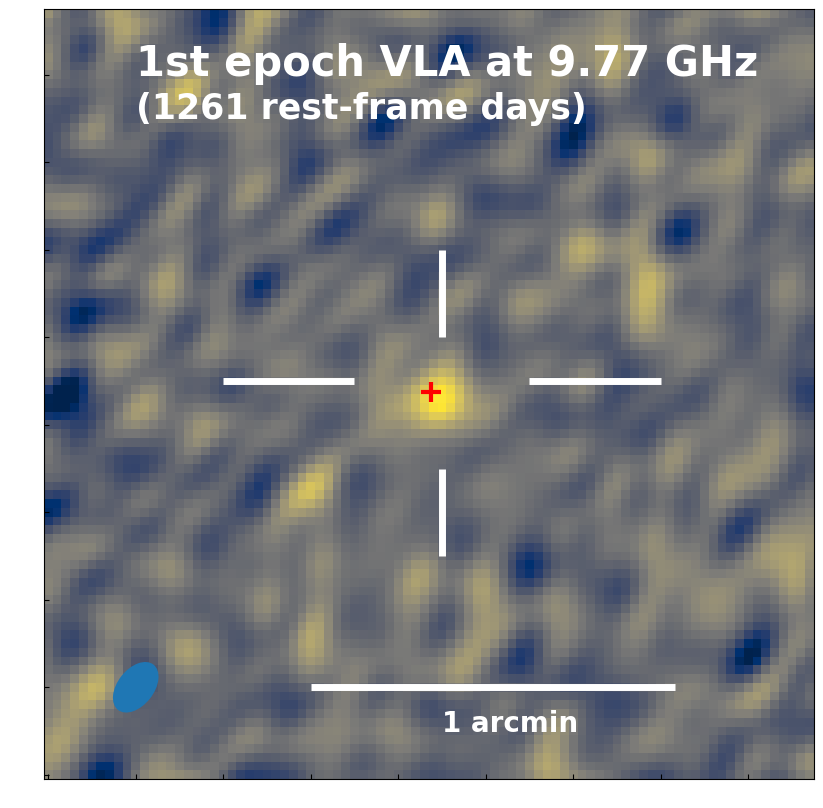

In [11]:
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch1/final.fits')
w = WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
#ax = plt.subplot(projection=w)

#plot radio image 6.535432e-06
#ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=-6.535432e-06, vmax=1.535432e-05)

ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=minpixelvalue1, vmax=maxpixelvalue1)
#ax.contour(hdu[0].data, levels=np.arange(1e-4,2e-4,0.001), colors='r', alpha=0.9,label='FIRST')
#plt.plot(352.7039246, -1.2075100,'+',transform=ax.get_transform('icrs'), color='red',ms=15,markeredgewidth=3,)
plt.plot(63.7407,63.690278,'+',color='red',ms=15,markeredgewidth=3)

#Add beam information
my_beam = Beam(9.473628044127599*u.arcsec, 5.983557224274*u.arcsec, -38.08634567261*u.deg)
ycen_pix, xcen_pix = 30, 30
pixscale = 4.000000000000E-04 * u.deg #CDELTA
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
#ax = plt.imshow(image)  
_ = ax.add_artist(ellipse_artist)

#set plot limits
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim[0]+20, ylim[1]-20)
ax.set_xlim(xlim[0]+20, xlim[1]-20)

#Add lines at the location of the source
plt.hlines(65,40, 40+ 15,color='white',lw=5)
plt.hlines(65,75, 75+15,color='white',lw=5)

plt.vlines(65,45, 45+10, color='white',lw=5)
plt.vlines(65,70, 70+10,color='white',lw=5)

#Add legends
plt.hlines(30,50,50+41.66666, color='white',lw=5)
ax.text(65,25,'1 arcmin',fontsize = 20, color='white', fontweight ='bold')

#ax.plot(249.3242699,41.44276565,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
ax.text(30,100,'1st epoch VLA at 9.77 GHz',fontsize = 30, color='white', fontweight ='bold')
ax.text(30,95,'(1261 rest-frame days)',fontsize = 25, color='white', fontweight ='bold')

#plt.xlabel(r'RA (ICRS)', fontsize =30,fontweight='bold')
#plt.ylabel(r'DEC (ICRS)',fontsize =30,fontweight='bold')
#plt.xticks(color='w')
#plt.yticks(color='w')
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
ax.tick_params(axis='both', which='both', direction='in')
plt.xticks(color='w')
plt.yticks(color='w')
#plt.xticks(color='w')

#plt.tick_params(labelsize=25,fontweight='bold')
#plt.ylabel(r'',fontsize =0)
plt.savefig('radio-epoch1-xband.png',bbox_inches='tight',dpi = 500)#, transparent = True)
#plt.show() 

-5.85019e-06 6.535432e-06


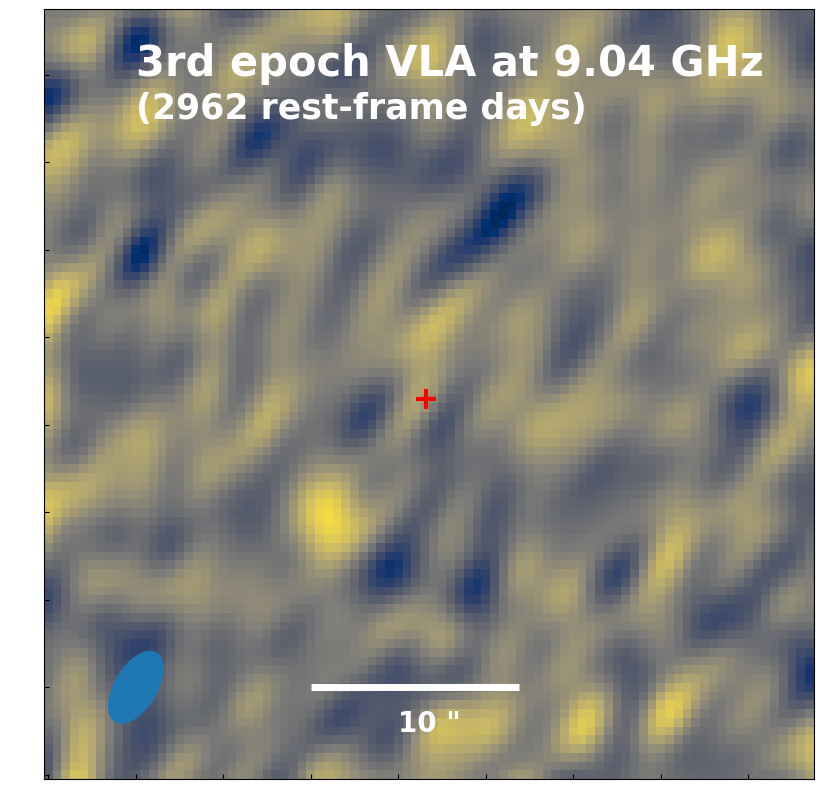

In [12]:
#3rd epoch X-band 9.77GHz
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch3/xband/final.fits')
w = WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
#ax = plt.subplot(projection=w)

#plot radio image
ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=-6.535432e-06, vmax=6.535432e-06)
#ax.contour(hdu[0].data, levels=np.arange(1e-4,2e-4,0.001), colors='r', alpha=0.9,label='FIRST')
#plt.plot(352.7039246, -1.2075100,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
plt.plot(64.217888-1,63.938095-1,'+',color='red',ms=15,markeredgewidth=3)

#Add beam information
my_beam = Beam(3.8915398120896003*u.arcsec, 2.0725388526916797*u.arcsec, -30.77527427673*u.deg)
ycen_pix, xcen_pix = 30, 30
pixscale = 1.166666666667E-04 * u.deg ##CDELTA
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
#ax = plt.imshow(image)  
_ = ax.add_artist(ellipse_artist)

#set plot limits
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim[0]+20, ylim[1]-20)
ax.set_xlim(xlim[0]+20, xlim[1]-20)

#Add legends
plt.hlines(30,50,50+23.809523809517007, color='white',lw=5)
ax.text(60,25,'10 "',fontsize = 20, color='white', fontweight ='bold')

#ax.plot(249.3242699,41.44276565,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
ax.text(30,100,'3rd epoch VLA at 9.04 GHz',fontsize = 30, color='white', fontweight ='bold')
ax.text(30,95,'(2962 rest-frame days)',fontsize = 25, color='white', fontweight ='bold')

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
ax.tick_params(axis='both', which='both', direction='in')
plt.xticks(color='w')
plt.yticks(color='w')
plt.savefig('radio-epoch3-9GHz.png',bbox_inches='tight',dpi = 500)


In [237]:
1.166666666667E-04*3600

0.42000000000012

-0.00014216721667077467 0.00014194353218152867
249.5 249.5
261.5 261.5


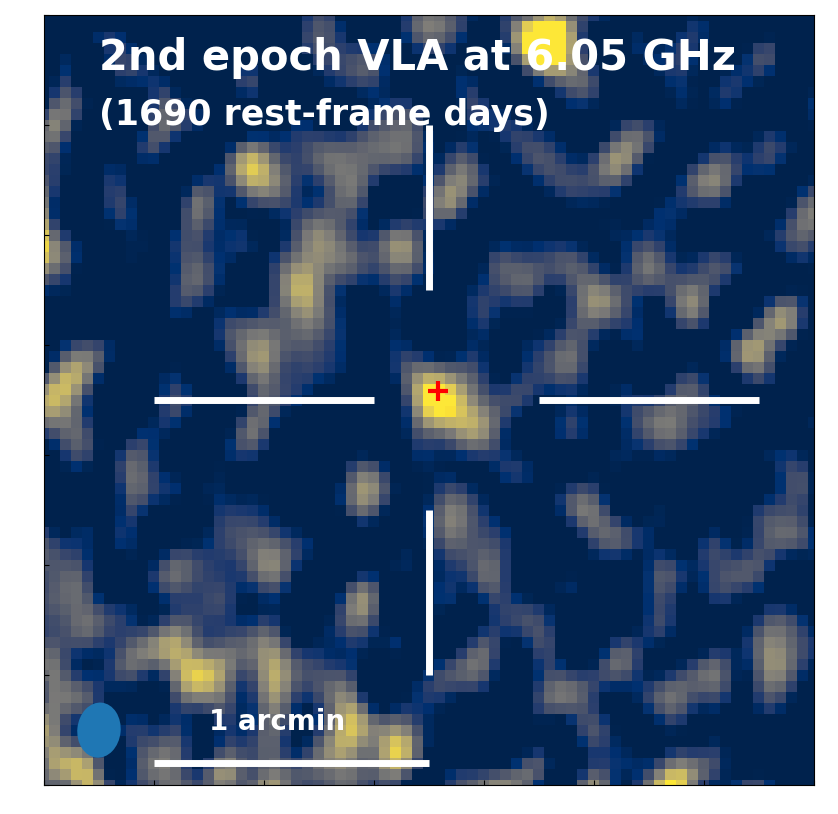

In [13]:
#2nd epoch C-band 6GHz
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch2/cband/final.fits')
w = WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
#ax = plt.subplot(projection=w)

#plot radio image -5.85019e-06 6.535432e-06
ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=-2.85019e-06, vmax=2.535432e-05)

#ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=minpixelvalue1-0.00006, vmax=maxpixelvalue1+0.00001)
#ax.contour(hdu[0].data, levels=np.arange(1e-4,2e-4,0.001), colors='r', alpha=0.9,label='FIRST')
#plt.plot(352.7039246, -1.2075100,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
plt.plot(256.84438-1,256.81417-1,'+',color='red',ms=15,markeredgewidth=3)

#Add beam information
my_beam = Beam(12.05418300628683*u.arcsec, 9.452024459838*u.arcsec, -5.62804889679*u.deg)
ycen_pix, xcen_pix = 225, 225
pixscale = 6.666666666667E-04 * u.deg ##CDELTA
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
#ax = plt.imshow(image)  
_ = ax.add_artist(ellipse_artist)

#set plot limits
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(220, 290)
ax.set_xlim(220, 290)
print(ylim[0]+250,xlim[0]+250)
print(ylim[1]-250,xlim[1]-250)
#Add lines at the location of the source
plt.hlines(255,230, 230+ 20,color='white',lw=5)
plt.hlines(255,265, 265+20,color='white',lw=5)

plt.vlines(255,230, 230+15, color='white',lw=5)
plt.vlines(255,265, 265+15,color='white',lw=5)

#Add legends
plt.hlines(222,230,230+24.999, color='white',lw=5)
ax.text(235,225,'1 arcmin',fontsize = 20, color='white', fontweight ='bold')

ax.text(225,285,'2nd epoch VLA at 6.05 GHz',fontsize = 30, color='white', fontweight ='bold')
ax.text(225,280,'(1690 rest-frame days)',fontsize = 25, color='white', fontweight ='bold')

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
ax.tick_params(axis='both', which='both', direction='in')
plt.xticks(color='w')
plt.yticks(color='w')
plt.savefig('radio-epoch2-6GHz.png',bbox_inches='tight',dpi = 500)


-2.1622624e-05 2.54535e-05


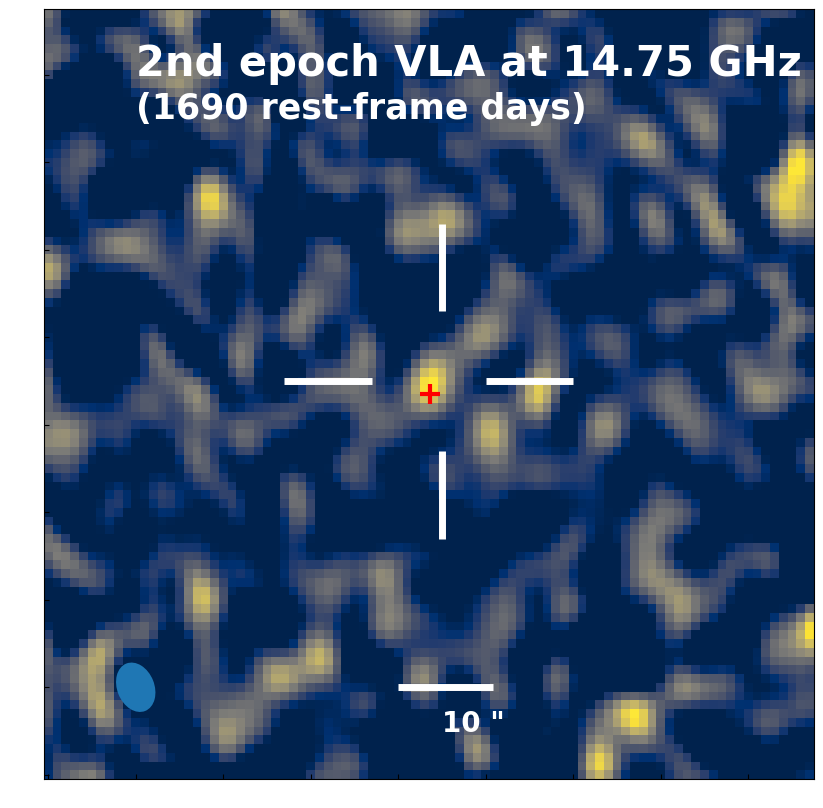

In [14]:
#2nd epoch Ku-band 15GHz
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch2/kuband/final.fits')
w= WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
#ax = plt.subplot(projection=w)

#plot radio image 6.535432e-06
ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=-1.535432e-06, vmax=1.535432e-05)

#ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=minpixelvalue1, vmax=maxpixelvalue1)
#ax.contour(hdu[0].data, levels=np.arange(1e-4,2e-4,0.001), colors='r', alpha=0.9,label='FIRST')
#plt.plot(352.7039246, -1.2075100,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
plt.plot(64.594047-1,64.515217-1,'+',color='red',ms=15,markeredgewidth=3)

#Add beam information 
my_beam = Beam(5.3644323349008*u.arcsec, 3.9145750999452*u.arcsec, 21.64622688293*u.deg)
ycen_pix, xcen_pix = 30, 30
pixscale = 2.555555555556E-04 * u.deg #CDELTA
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
#ax = plt.imshow(image)  
_ = ax.add_artist(ellipse_artist)

#set plot limits
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim[0]+20, ylim[1]-20)
ax.set_xlim(xlim[0]+20, xlim[1]-20)

#Add lines at the location of the source
plt.hlines(65,47, 47+ 10,color='white',lw=5)
plt.hlines(65,70, 70+10,color='white',lw=5)

plt.vlines(65,47, 47+10, color='white',lw=5)
plt.vlines(65,73, 73+10,color='white',lw=5)

#Add legends
plt.hlines(30,60,60+10.869565217389415, color='white',lw=5)
ax.text(65,25,'10 "',fontsize = 20, color='white', fontweight ='bold')

#ax.plot(249.3242699,41.44276565,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
ax.text(30,100,'2nd epoch VLA at 14.75 GHz',fontsize = 30, color='white', fontweight ='bold')
ax.text(30,95,'(1690 rest-frame days)',fontsize = 25, color='white', fontweight ='bold')

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
ax.tick_params(axis='both', which='both', direction='in')
plt.xticks(color='w')
plt.yticks(color='w')

plt.savefig('radio-epoch2-kuband.png',bbox_inches='tight',dpi = 500)#, transparent = True)


-1.795569e-05 2.7550423e-05


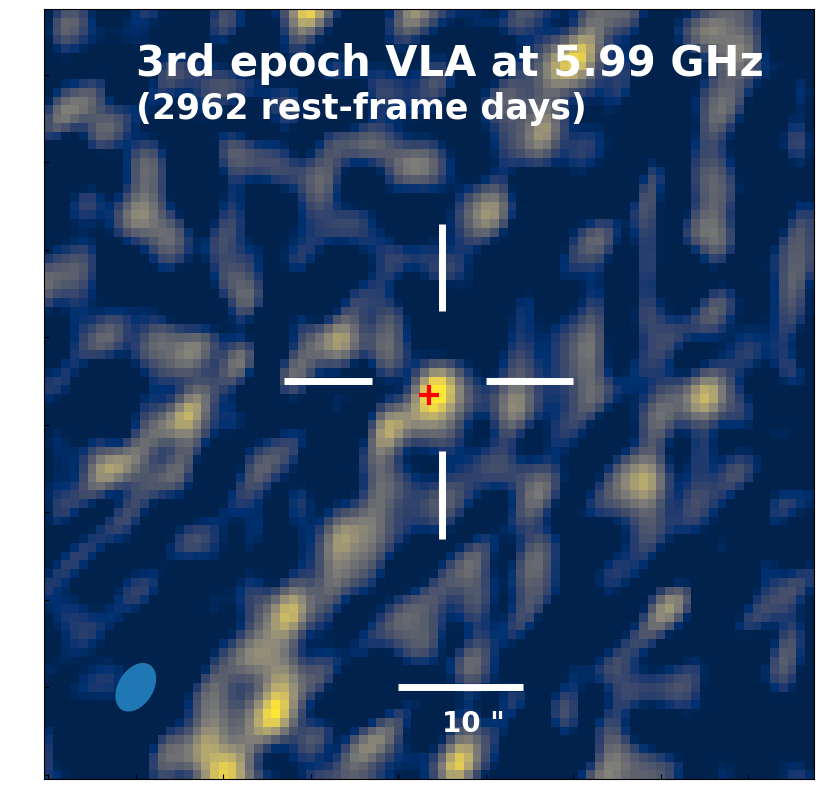

In [15]:
#3rd epoch c-band 5.99 GHz
hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/PS11aop_RadioImages/Epoch3/cband/final.fits')
w= WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
#ax = plt.subplot(projection=w)

#plot radio image 6.535432e-06
ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=-1.535432e-06, vmax=2.535432e-05)

#ima=ax.imshow(image_data1[0,0,:,:],origin='lower', cmap='cividis', vmin=minpixelvalue1, vmax=maxpixelvalue1)
#ax.contour(hdu[0].data, levels=np.arange(1e-4,2e-4,0.001), colors='r', alpha=0.9,label='FIRST')
#plt.plot(352.7039246, -1.2075100,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
plt.plot(64.530733-1,64.362857-1,'+',color='red',ms=15,markeredgewidth=3)

#Add beam information 
my_beam = Beam(4.2343463897712*u.arcsec, 2.80727791786188*u.arcsec, -31.8940486908*u.deg)
ycen_pix, xcen_pix = 30, 30
pixscale = 1.944444444444E-04 * u.deg #CDELTA
ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
#ax = plt.imshow(image)  
_ = ax.add_artist(ellipse_artist)

#set plot limits
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim[0]+20, ylim[1]-20)
ax.set_xlim(xlim[0]+20, xlim[1]-20)

#Add lines at the location of the source
plt.hlines(65,47, 47+ 10,color='white',lw=5)
plt.hlines(65,70, 70+10,color='white',lw=5)

plt.vlines(65,47, 47+10, color='white',lw=5)
plt.vlines(65,73, 73+10,color='white',lw=5)

#Add legends
plt.hlines(30,60,60+14.285714285717551, color='white',lw=5)
ax.text(65,25,'10 "',fontsize = 20, color='white', fontweight ='bold')

#ax.plot(249.3242699,41.44276565,'+',transform=ax.get_transform('icrs'), color='white',ms=15,markeredgewidth=3,)
ax.text(30,100,'3rd epoch VLA at 5.99 GHz',fontsize = 30, color='white', fontweight ='bold')
ax.text(30,95,'(2962 rest-frame days)',fontsize = 25, color='white', fontweight ='bold')

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
ax.tick_params(axis='both', which='both', direction='in')
plt.xticks(color='w')
plt.yticks(color='w')

plt.savefig('radio-epoch3-cband.png',bbox_inches='tight',dpi = 500)#, transparent = True)
